In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

from sppanalysis_script import *

In [2]:
wordnet_coll = pd.read_csv('NT_trials_split_up_collocation_pairs.csv')
raw_data = pd.read_excel('all naming subjects.xlsx')
wordnet_sim = pd.read_csv('NT_trials_split_up_WordNet_pairs.csv')

In [15]:
wordnet_coll

,subjID,prime,target,RT,accuracy,Path Similarity,Wu-Palmer Similarity,Leacock-Chodorow Similarity,Resnik Similarity,Jiang-Conrath Similarity,Lin Similarity,reuters,brown,gutenberg,webtext,weighted_avg
0,1,last,chance,435.0,1.0,0.333333,0.500000,2.159484,0.000000,7.026908e-02,0.000000,0.000666,0.000000,0.000766,0.010000,0.000972
1,1,grocery,store,487.0,1.0,0.250000,0.857143,2.251292,7.483665,3.619790e-01,0.844185,0.250000,0.428571,NaN,0.000000,0.277778
2,1,ozone,layer,394.0,1.0,0.111111,0.333333,1.440362,0.801759,5.093390e-02,0.075507,1.000000,0.000000,0.000000,NaN,0.333333
3,1,time,clock,394.0,1.0,1.000000,1.000000,3.258097,7.388911,1.000000e+300,1.000000,0.000000,0.000643,0.000000,0.000000,0.000185
4,1,lift,one,460.0,1.0,0.250000,0.400000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.250000,0.004673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14025,319,in,out,521.0,1.0,0.333333,0.500000,NaN,NaN,NaN,NaN,0.000000,0.000154,0.000031,0.000000,0.000049
14026,319,human,being,481.0,1.0,0.333333,0.500000,NaN,NaN,NaN,NaN,0.000000,0.044218,0.047210,0.000000,0.042629
14027,319,hung,up,526.0,1.0,0.333333,0.500000,NaN,NaN,NaN,NaN,0.000000,0.138462,0.049505,0.142857,0.085714
14028,319,asteroid,belt,434.0,1.0,0.200000,0.333333,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000


In [3]:
wordnet_sim = pd.concat([wordnet_coll, wordnet_sim])

In [4]:
isi50, isi1050 = data_processing(wordnet_sim, raw_data) #taking only the low pathsim rating wordpairs from wordnet since high pathsim rating has significant effect on RT and acc
col_50_0, col_50_1, col_1050_0, col_1050_1 = sim_split(isi50, isi1050, 'Wu-Palmer Similarity', 0.5,0.5)


In [5]:
"""
both tscore results are significant
"""

rt50_score, acc50_score = get_tscore(col_50_0, col_50_1)
rt1050_score, acc1050_score = get_tscore(col_1050_0, col_1050_1)

print(rt50_score)
print(acc50_score)
print(rt1050_score)
print(acc1050_score)

Ttest_indResult(statistic=7.822115466186634, pvalue=5.22010534097247e-15)
Ttest_indResult(statistic=-6.182869638144301, pvalue=6.307090759539167e-10)
Ttest_indResult(statistic=7.111943211288557, pvalue=1.148137562521883e-12)
Ttest_indResult(statistic=-7.830507755640434, pvalue=4.883445557193799e-15)


In [6]:
get_descrip(col_50_0, col_50_1)

,RT_mean,RT_std,acc_mean,acc_std
less related,555.644851,190.246196,0.984887,0.122004
more related,548.963239,186.160107,0.988131,0.108295


In [7]:
get_descrip(col_1050_0, col_1050_1)

,RT_mean,RT_std,acc_mean,acc_std
less related,545.234802,204.405967,0.985094,0.121179
more related,538.704089,198.968677,0.989126,0.103712


In [8]:
new_isi50 = pd.concat([col_50_0, col_50_1])
new_isi1050 = pd.concat([col_1050_0, col_1050_1])

grouped_50 = uni_wordpair(new_isi50, 'Wu-Palmer Similarity')
grouped_1050 = uni_wordpair(new_isi1050, 'Wu-Palmer Similarity')

In [9]:
list50 = get_sim(grouped_50, '50', 'Wu-Palmer Similarity')
list1050 = get_sim(grouped_1050, '1050', 'Wu-Palmer Similarity')

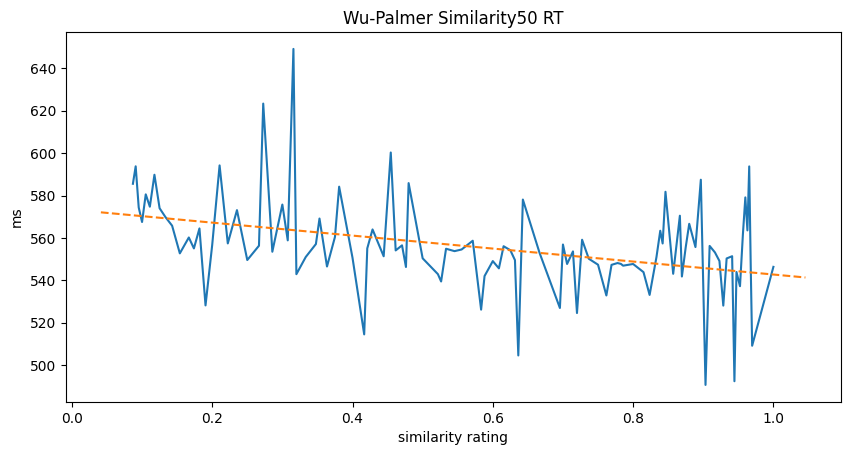

<Figure size 640x480 with 0 Axes>

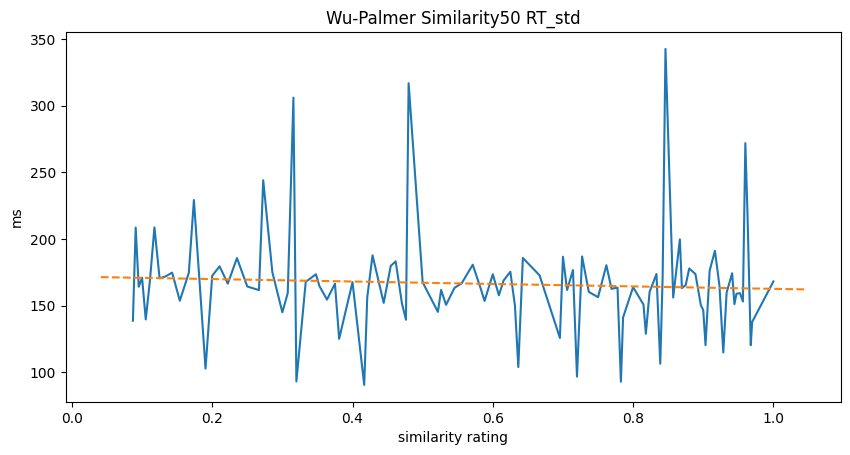

<Figure size 640x480 with 0 Axes>

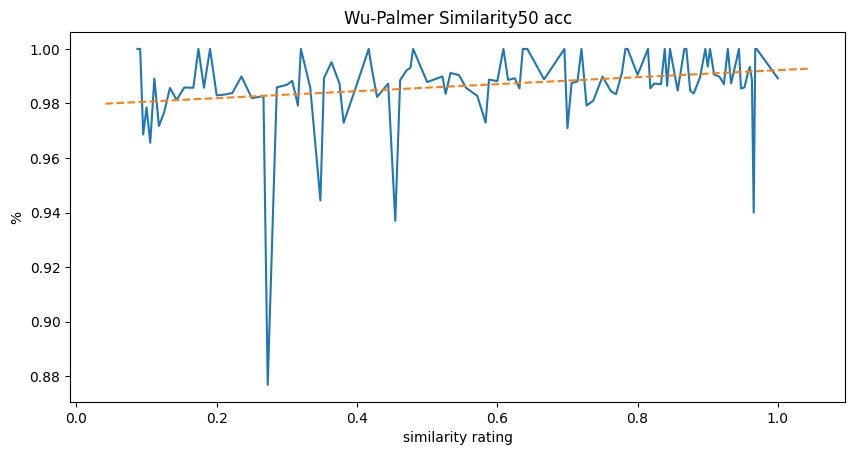

<Figure size 640x480 with 0 Axes>

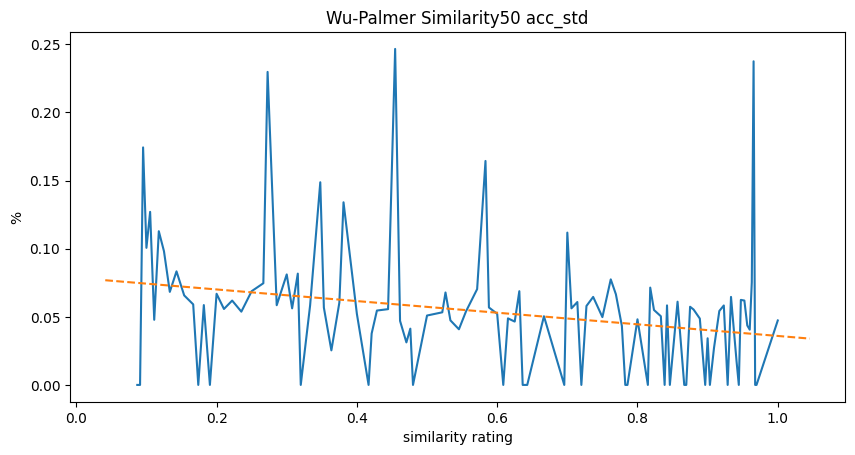

<Figure size 640x480 with 0 Axes>

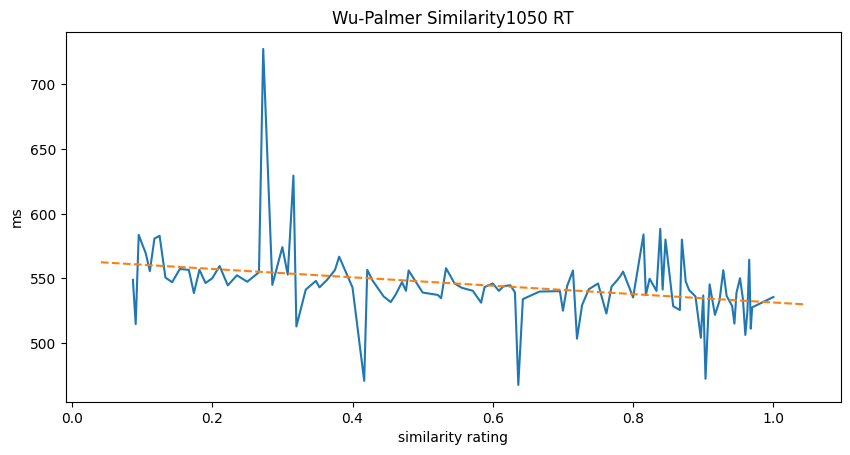

<Figure size 640x480 with 0 Axes>

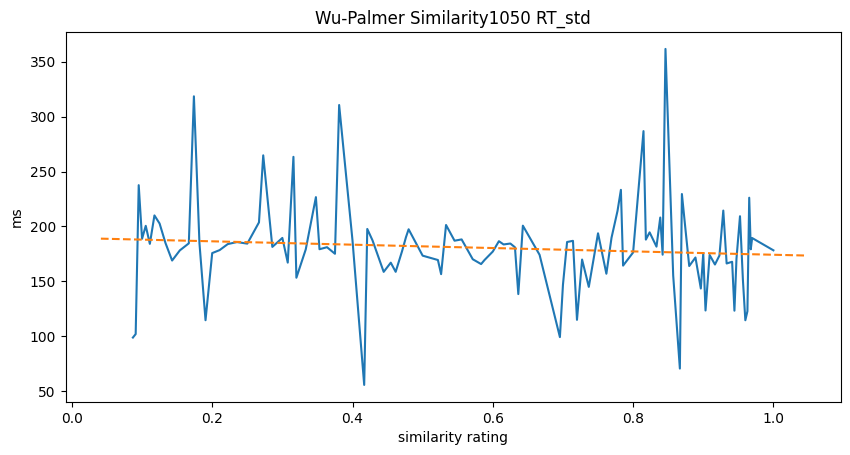

<Figure size 640x480 with 0 Axes>

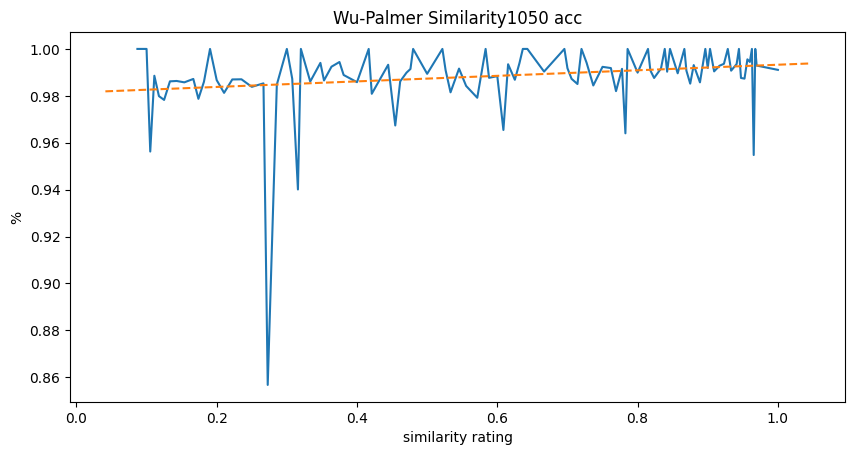

<Figure size 640x480 with 0 Axes>

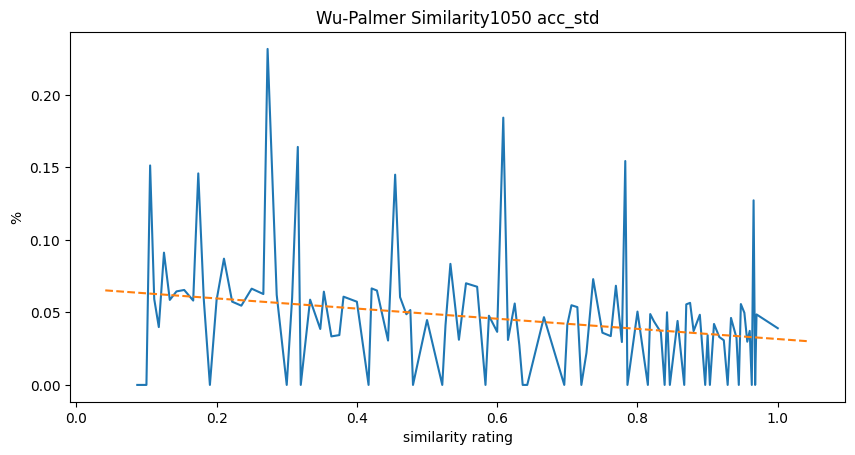

<Figure size 640x480 with 0 Axes>

In [10]:
make_plots(list50, list1050)